In [3]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración de rutas y modelos
model_dirs = {
    "SimpleCNN": "models/SimpleCNN",
    "VGG16": "models/VGG16", 
    "ResNet18": "models/RESNET18"
}

In [4]:
def load_model_data(model_name, model_path):
    history_file = os.path.join(model_path, "epoch_metrics.json")
    
    if not os.path.exists(history_file):
        print(f"Advertencia: No se encontró {history_file}")
        return pd.DataFrame()
    
    with open(history_file, 'r') as f:
        data = json.load(f)
    
    # Convertir a DataFrame y agregar nombre del modelo
    df = pd.DataFrame(data)
    df["model"] = model_name
    return df

In [5]:
all_data = []
for model_name, model_path in model_dirs.items():
    model_df = load_model_data(model_name, model_path)
    if not model_df.empty:
        all_data.append(model_df)
    else:
        print(f"Saltando {model_name}: Datos no disponibles")

full_df = pd.concat(all_data, ignore_index=True)
full_df

,epoch,train_loss,val_loss,val_accuracy,learning_rate,val_precision_anomaly,val_recall_anomaly,val_f1_anomaly,val_precision_normal,val_recall_normal,val_f1_normal,model
0,1,0.157768,0.055932,0.984,0.000300,0.978512,0.994958,0.986667,0.992405,0.967901,0.980000,SimpleCNN
1,2,0.063757,0.032797,0.992,0.000300,0.993277,0.993277,0.993277,0.990123,0.990123,0.990123,SimpleCNN
2,3,0.055336,0.029848,0.995,0.000300,0.998311,0.993277,0.995788,0.990196,0.997531,0.993850,SimpleCNN
3,4,0.066882,0.051191,0.991,0.000300,0.991611,0.993277,0.992443,0.990099,0.987654,0.988875,SimpleCNN
4,5,0.040586,0.031264,0.994,0.000300,0.996627,0.993277,0.994949,0.990172,0.995062,0.992611,SimpleCNN
5,6,0.041518,0.029228,0.994,0.000300,0.996627,0.993277,0.994949,0.990172,0.995062,0.992611,SimpleCNN
6,7,0.029376,0.025495,0.995,0.000300,0.998311,0.993277,0.995788,0.990196,0.997531,0.993850,SimpleCNN
7,8,0.031928,0.022339,0.995,0.000150,0.998311,0.993277,0.995788,0.990196,0.997531,0.993850,SimpleCNN
8,9,0.028055,0.026661,0.995,0.000150,0.998311,0.993277,0.995788,0.990196,0.997531,0.993850,SimpleCNN
9,10,0.027335,0.024845,0.995,0.000150,0.998311,0.993277,0.995788,0.990196,0.997531,0.993850,SimpleCNN


Text(0.5, 0, 'Época')

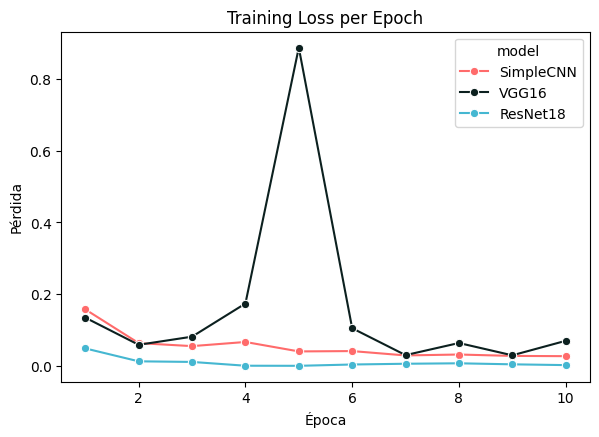

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.lineplot(
    data=full_df,
    x="epoch",
    y="train_loss",
    hue="model",
    marker="o",
    palette=["#FF6B6B", "#0C201F", "#45B7D1"]
)

plt.title("Training Loss per Epoch")
plt.ylabel("Pérdida")
plt.xlabel("Época")

Text(0.5, 0, 'Époch')

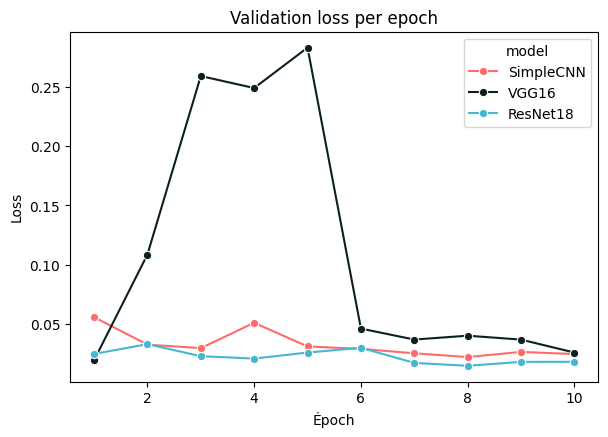

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.lineplot(
    data=full_df,
    x="epoch",
    y="val_loss",
    hue="model",
    marker="o",
    palette=["#FF6B6B", "#0C201F", "#45B7D1"]
)

plt.title("Validation loss per epoch")
plt.ylabel("Loss")
plt.xlabel("Époch")

(0.99, 1.0)

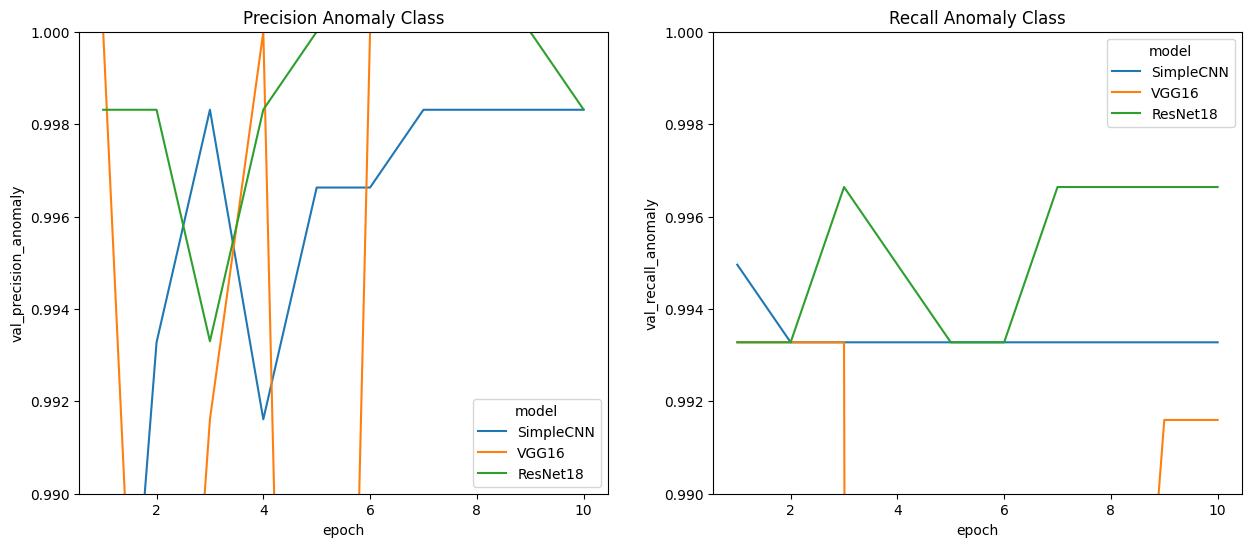

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Clase "Anomaly"
sns.lineplot(data=full_df, x="epoch", y="val_precision_anomaly", hue="model", ax=axes[0])
axes[0].set_title("Precision Anomaly Class")
axes[0].set_ylim(0.99, 1.0)

# Clase "Normal"
sns.lineplot(data=full_df, x="epoch", y="val_recall_anomaly", hue="model", ax=axes[1])
axes[1].set_title("Recall Anomaly Class")
axes[1].set_ylim(0.99, 1.0)

(0.99, 1.0)

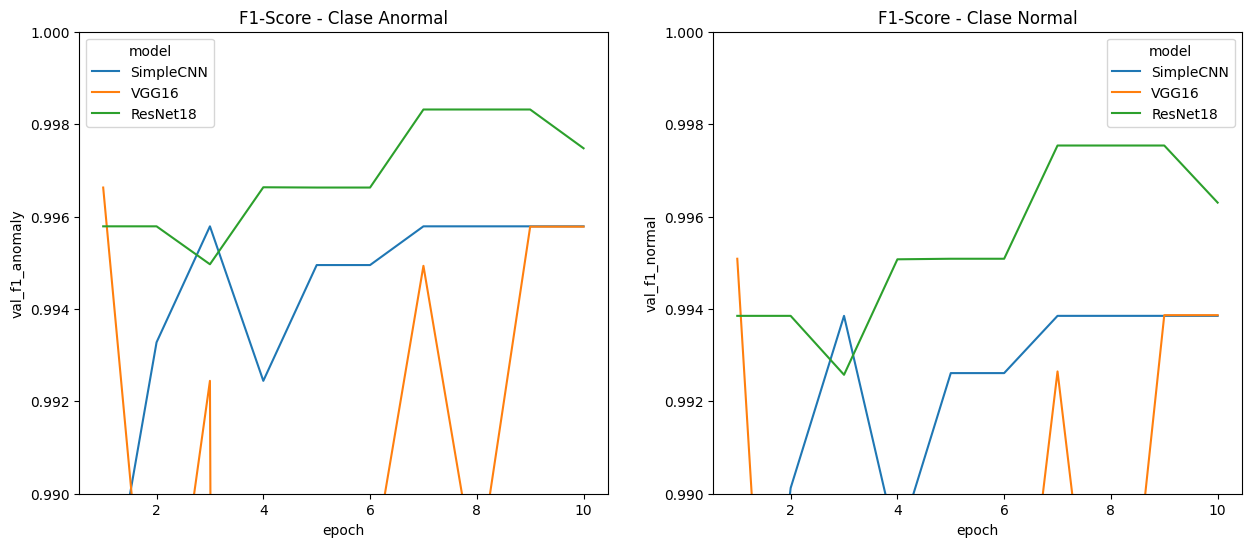

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Clase "Anomaly"
sns.lineplot(data=full_df, x="epoch", y="val_f1_anomaly", hue="model", ax=axes[0])
axes[0].set_title("F1-Score - Clase Anormal")
axes[0].set_ylim(0.99, 1.0)

# Clase "Normal"
sns.lineplot(data=full_df, x="epoch", y="val_f1_normal", hue="model", ax=axes[1])
axes[1].set_title("F1-Score - Clase Normal")
axes[1].set_ylim(0.99, 1.0)

Text(0, 0.5, 'Valor')

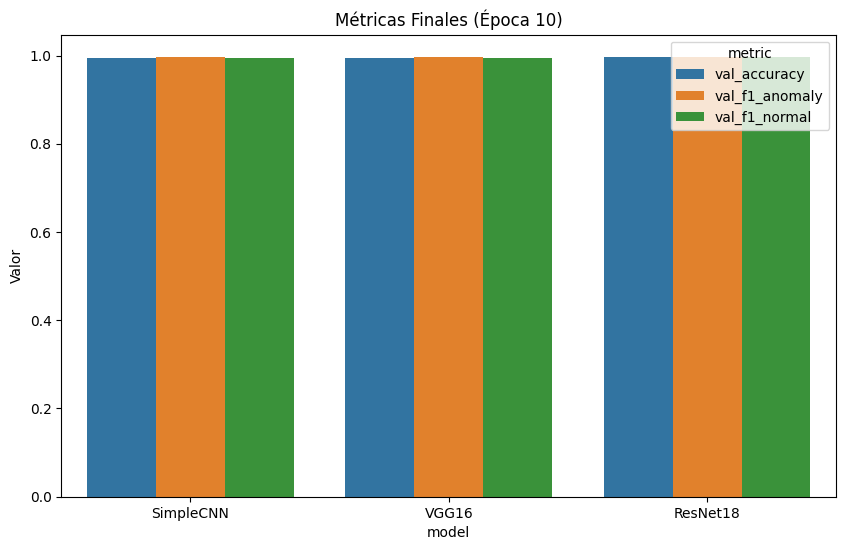

In [21]:
last_epoch = full_df[full_df["epoch"] == 10][["model", "val_accuracy", "val_f1_anomaly", "val_f1_normal"]]
last_epoch_melted = pd.melt(last_epoch, id_vars="model", var_name="metric")

plt.figure(figsize=(10, 6))
sns.barplot(data=last_epoch_melted, x="model", y="value", hue="metric")
plt.title("Métricas Finales (Época 10)")
plt.ylabel("Valor")